In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
df=os.path.join(r"C:\Users\pabba\OneDrive\Documents\Python Data Analysis\Capstone Project\Dataset.csv")
ChurnModelling=pd.read_csv(df)
ChurnModelling

# Preprocessing
X = ChurnModelling.drop('Churn', axis=1)
y = ChurnModelling['Churn']

# Create a binned variable based on DataUsage
X['DataUsage_bin'] = pd.cut(X['DataUsage'], bins=3, labels=False)

# Optional: Create new features if necessary (example: ratio of DayMins to DayCalls)
X['DayMins_per_Call'] = X['DayMins'] / X['DayCalls']
X['OverageFee_to_MonthlyCharge'] = X['OverageFee'] / X['MonthlyCharge']

# Fill NaN values (if any) resulting from division
X.fillna(0, inplace=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMins_per_Call', 'OverageFee_to_MonthlyCharge']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Encode categorical variables (if any)
# In this dataset, all features are numerical or binary, so no encoding is needed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and print model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-Score: {f1_score(y_test,y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    

# List of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True),
    "Neural Network": MLPClassifier(max_iter=300)
}

# Evaluate models without SMOTE
print("### Model Performance Without SMOTE ###")
for name, model in models.items():
    print(f"\n{name}")
    evaluate_model(model, X_train, X_test, y_train, y_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Evaluate models with SMote
print("\n### Model Performance With SMOTE ###")
for name, model in models.items():
    print(f"\n{name}")
    evaluate_model(model, X_train_smote, X_test, y_train_smote, y_test)


### Model Performance Without SMOTE ###

Logistic Regression
Accuracy: 0.8575712143928036
Precision: 0.6153846153846154
Recall: 0.15841584158415842
F1-Score: 0.25196850393700787
ROC AUC: 0.5703739985305951
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.62      0.16      0.25       101

    accuracy                           0.86       667
   macro avg       0.74      0.57      0.59       667
weighted avg       0.83      0.86      0.82       667

Confusion Matrix:
[[556  10]
 [ 85  16]]

Decision Tree
Accuracy: 0.8845577211394303
Precision: 0.625
Recall: 0.594059405940594
F1-Score: 0.6091370558375634
ROC AUC: 0.7652275828289543
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       566
           1       0.62      0.59      0.61       101

    accuracy                           0.88       667
   macro avg      

Accuracy: 0.8920539730134932
Precision: 0.6124031007751938
Recall: 0.7821782178217822
F1-Score: 0.6869565217391305
ROC AUC: 0.8469194976034706
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       566
           1       0.61      0.78      0.69       101

    accuracy                           0.89       667
   macro avg       0.79      0.85      0.81       667
weighted avg       0.91      0.89      0.90       667

Confusion Matrix:
[[516  50]
 [ 22  79]]


In [4]:
X.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DataUsage_bin,DayMins_per_Call,OverageFee_to_MonthlyCharge
0,0.676489,1,1,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085008,2,0.735099,-1.256374
1,0.149065,1,1,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240482,3,-0.761059,-1.123315
2,0.902529,1,0,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703121,0,0.359875,-1.166714
3,-0.428590,0,0,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303026,0,3.201312,-2.154830
4,-0.654629,0,0,-0.641642,1.092641,-0.240090,0.626149,-0.931902,-1.037927,-0.049184,0,-0.540767,-0.142276


In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
df=os.path.join(r"C:\Users\pabba\OneDrive\Documents\Python Data Analysis\Capstone Project\Dataset.csv")
ChurnModelling=pd.read_csv(df)
ChurnModelling

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [6]:
# Create a binned variable based on DataUsage
ChurnModelling['DataUsage_bin'] = pd.cut(ChurnModelling['DataUsage'], bins=3, labels=False)

# Optional: Create new features if necessary (example: ratio of DayMins to DayCalls)
ChurnModelling['DayMins_per_Call'] = ChurnModelling['DayMins'] / ChurnModelling['DayCalls']
ChurnModelling['OverageFee_to_MonthlyCharge'] = ChurnModelling['OverageFee'] / ChurnModelling['MonthlyCharge']

# Fill NaN values (if any) resulting from division
ChurnModelling.fillna(0, inplace=True)
ChurnModelling

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DataUsage_bin,DayMins_per_Call,OverageFee_to_MonthlyCharge
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0,1,2.410000,0.110899
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7,2,1.313821,0.119268
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,0,2.135088,0.116538
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6,0,4.216901,0.054386
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1,0,1.475221,0.180976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9,1,2.028571,0.150349
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,0,4.054386,0.135993
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,0,1.658716,0.257857
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0,0,2.036190,0.159600


In [9]:
churn_distribution=ChurnModelling['Churn'].value_counts(normalize=True)
print(churn_distribution)
datausage_distrubution=ChurnModelling['DataUsage_bin'].value_counts(normalize=True)
print(datausage_distrubution)

0    0.855086
1    0.144914
Name: Churn, dtype: float64
0    0.750975
1    0.214521
2    0.034503
Name: DataUsage_bin, dtype: float64


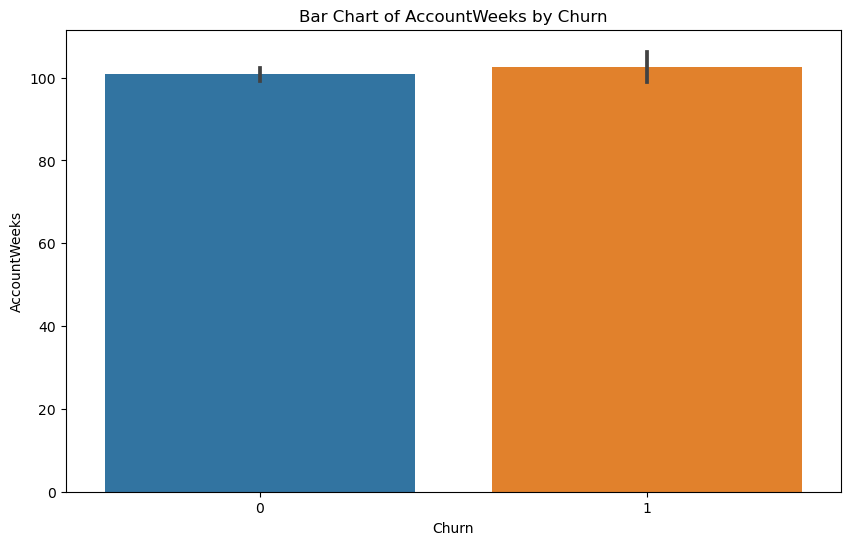

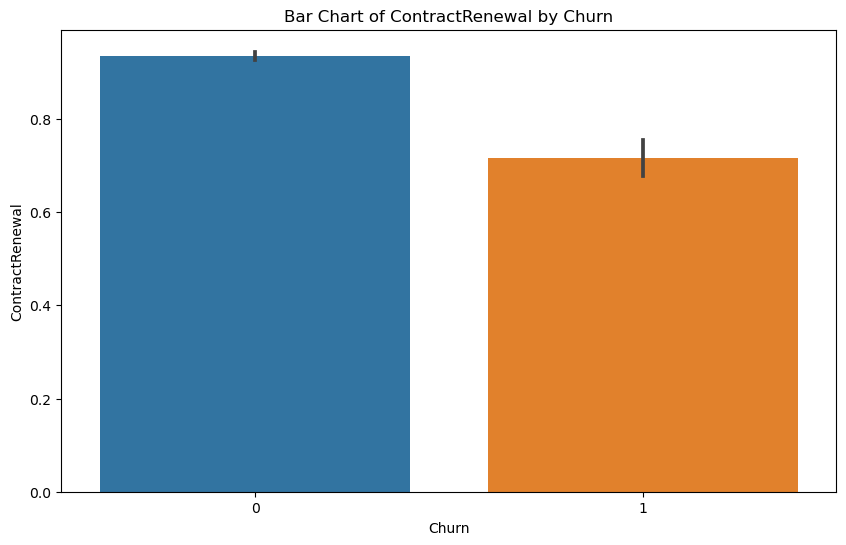

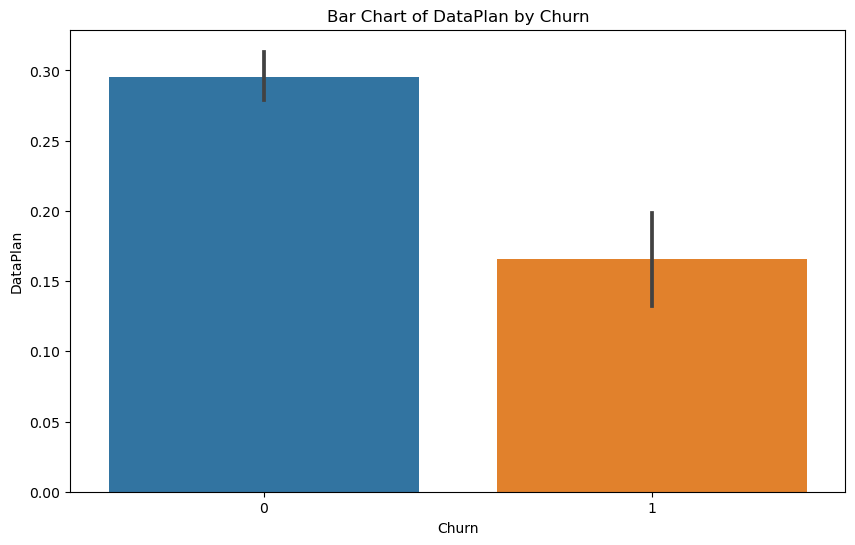

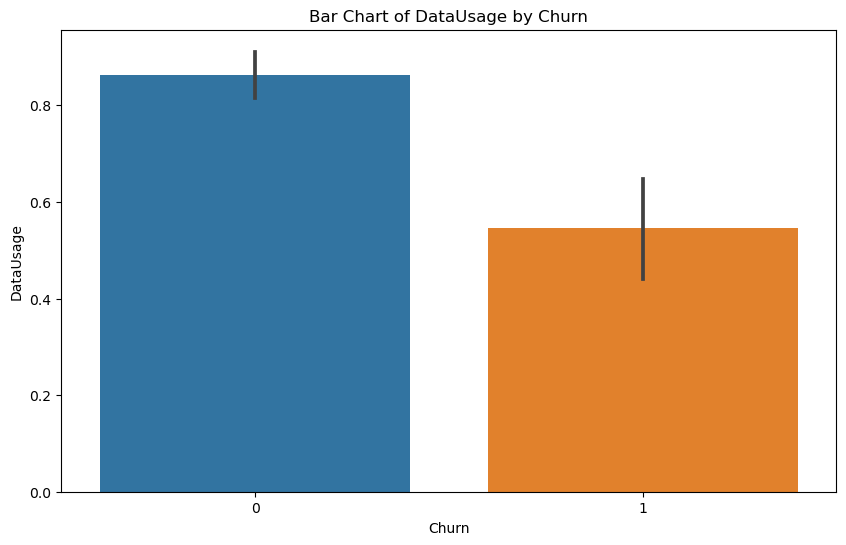

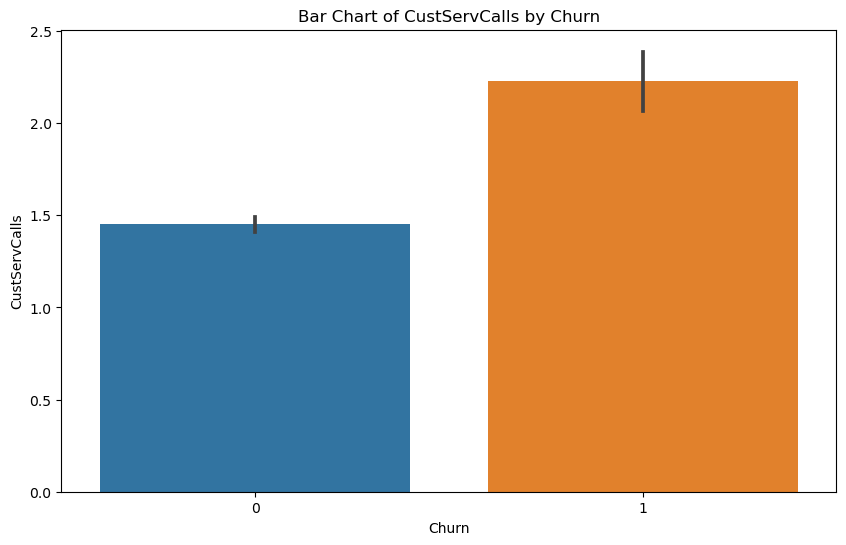

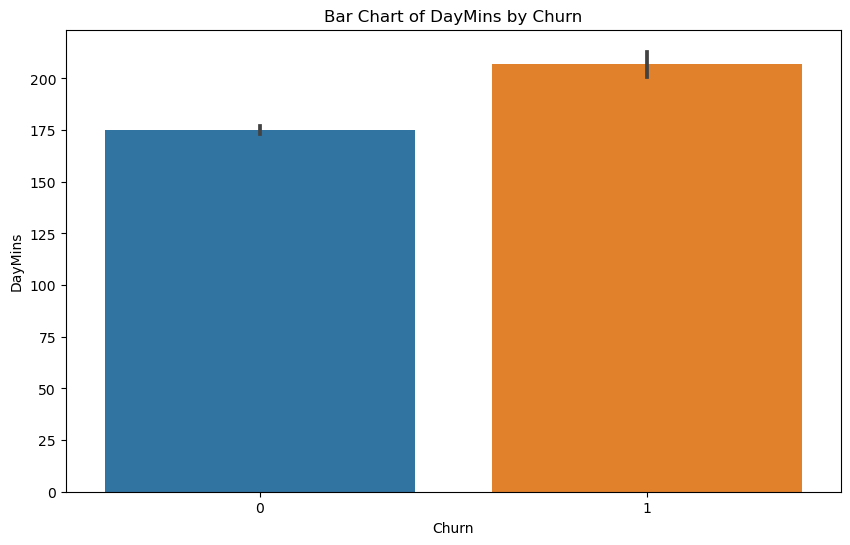

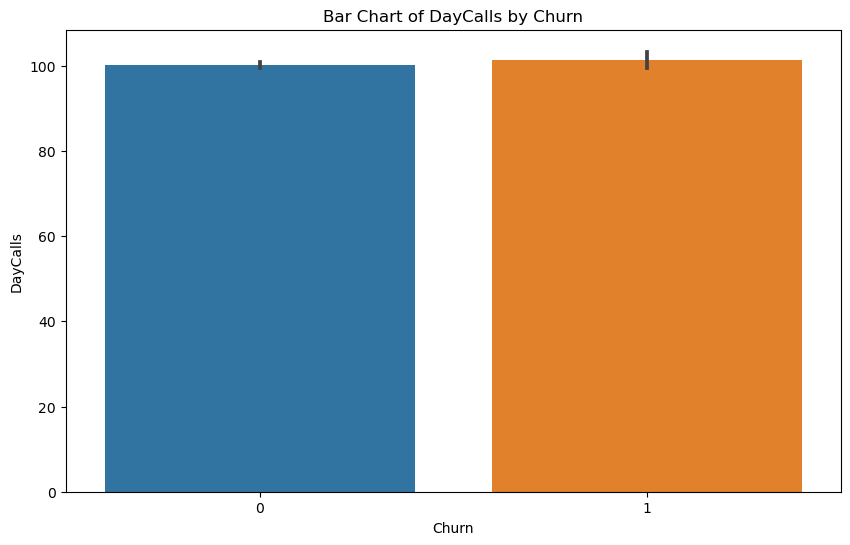

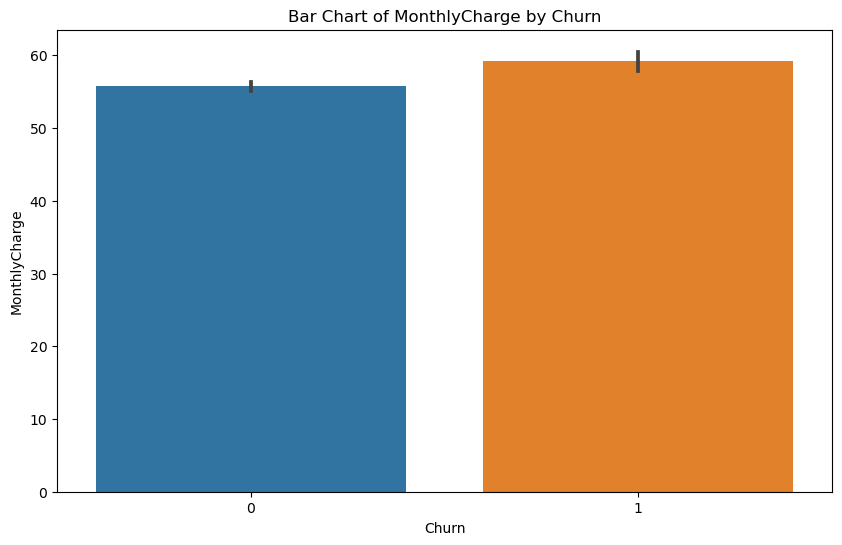

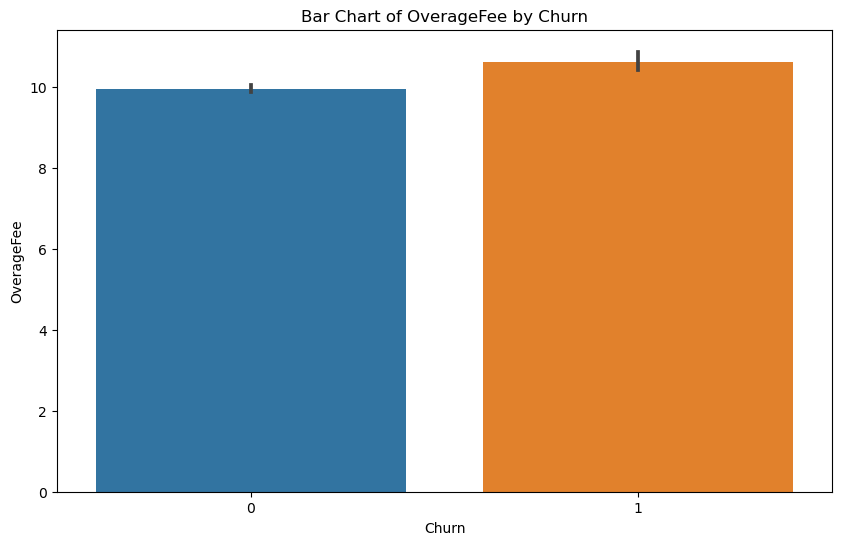

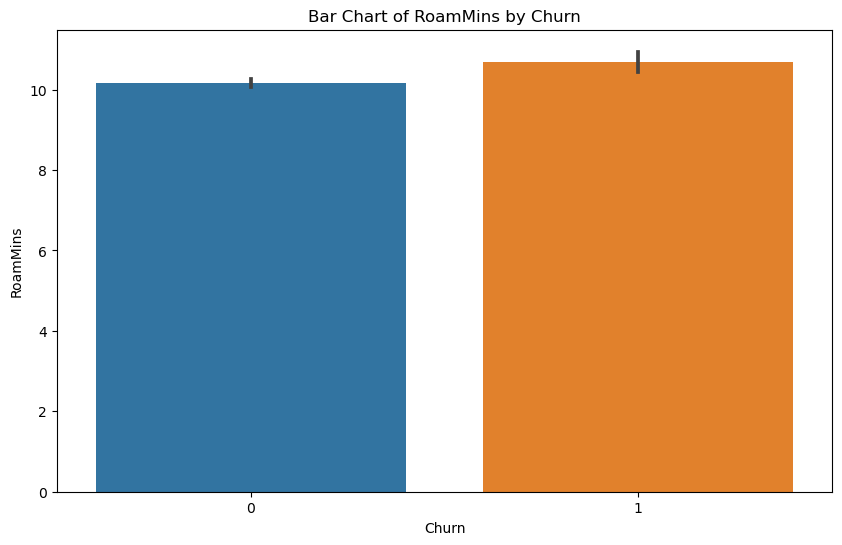

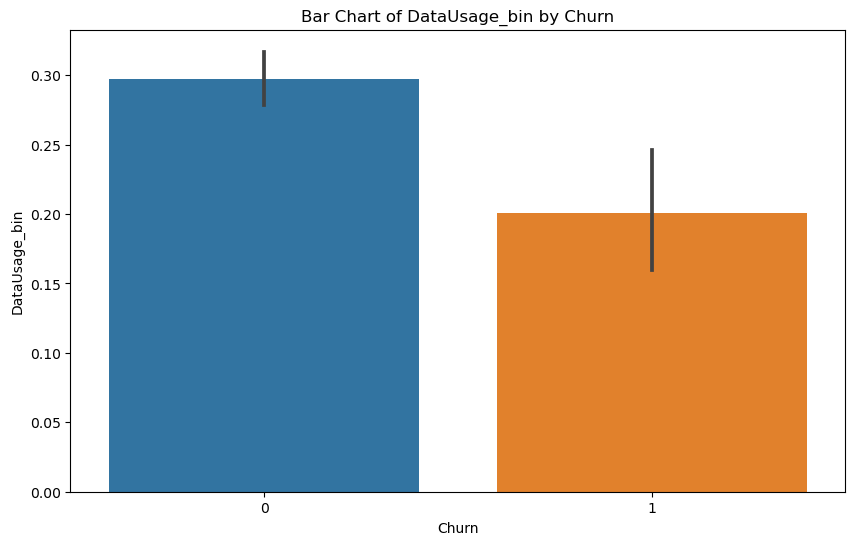

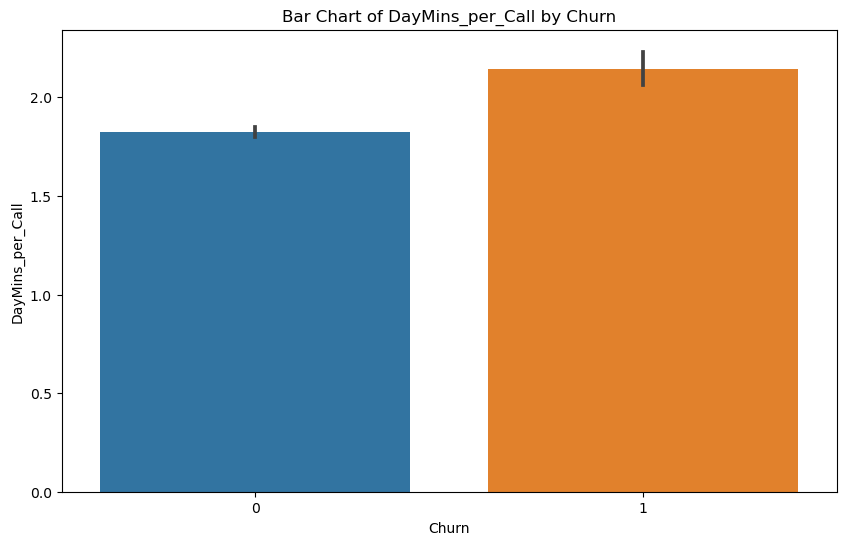

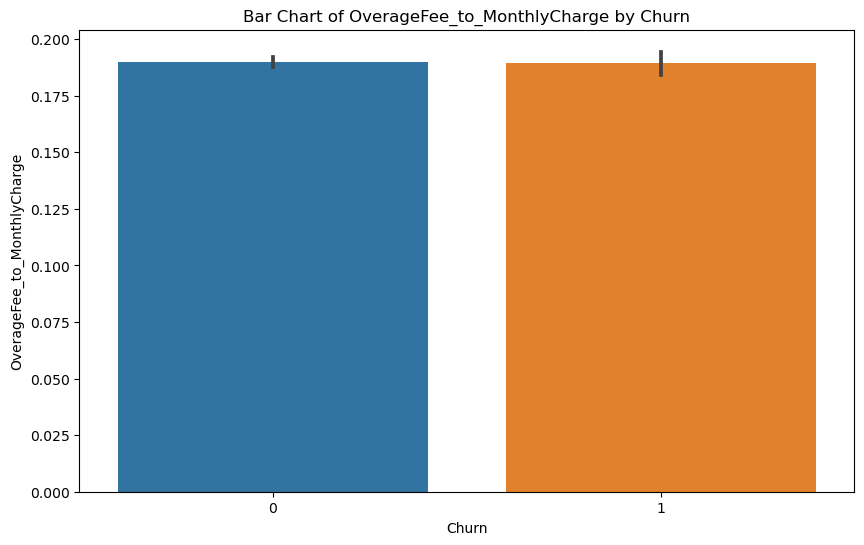

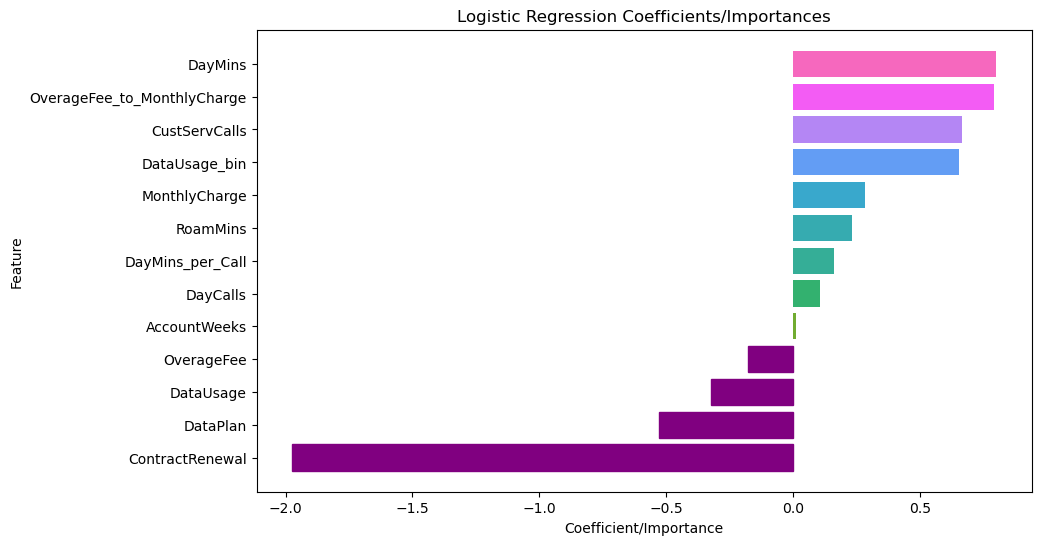

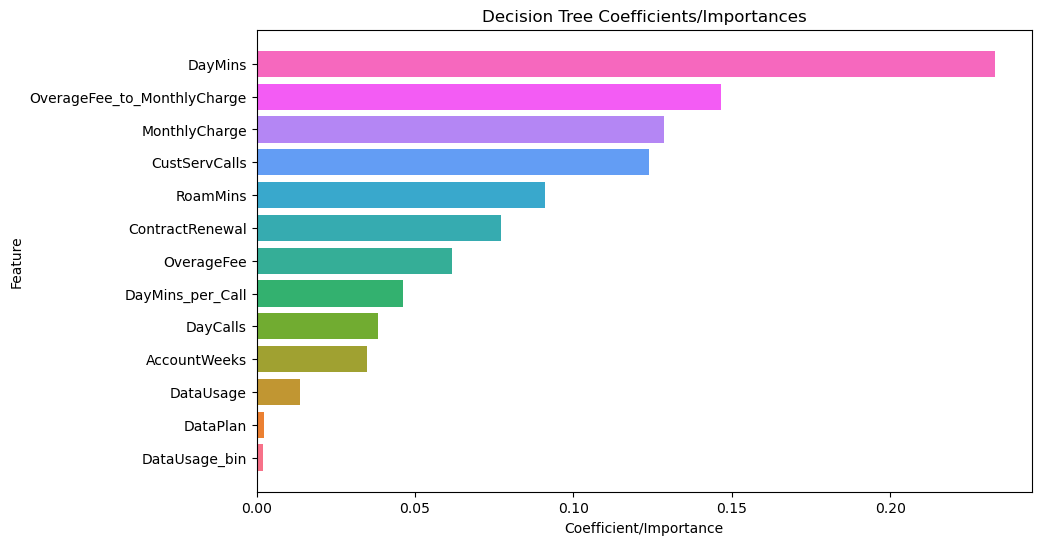

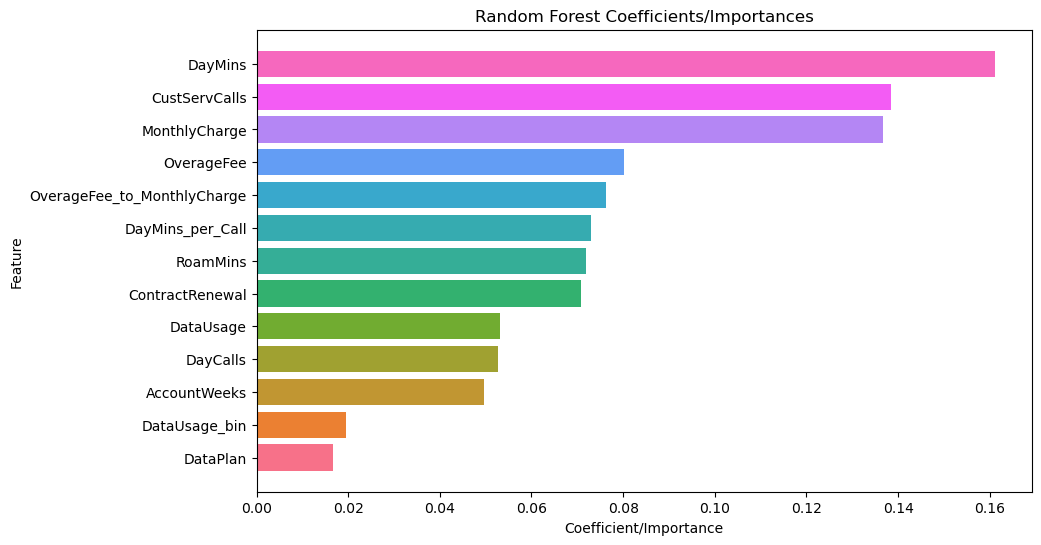

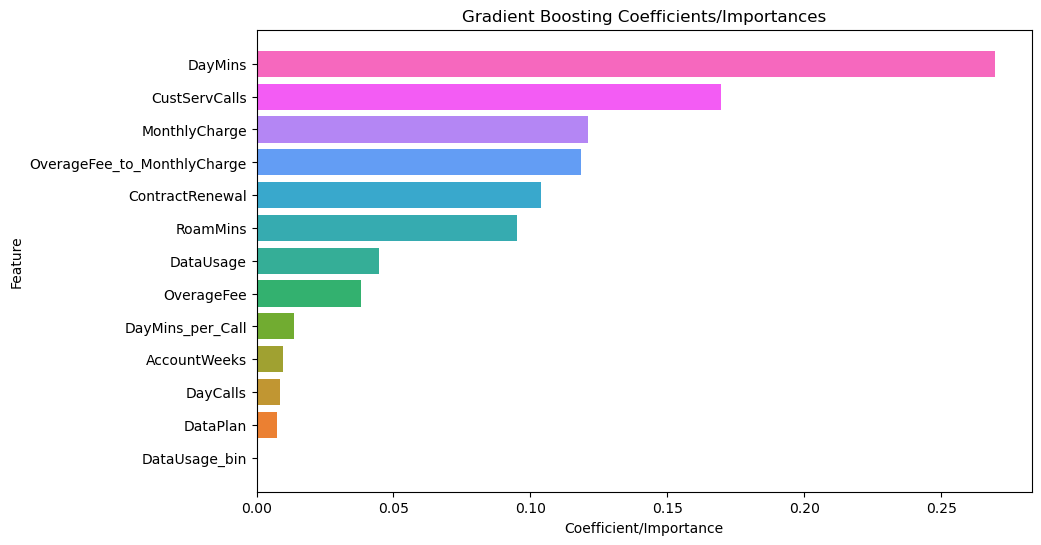

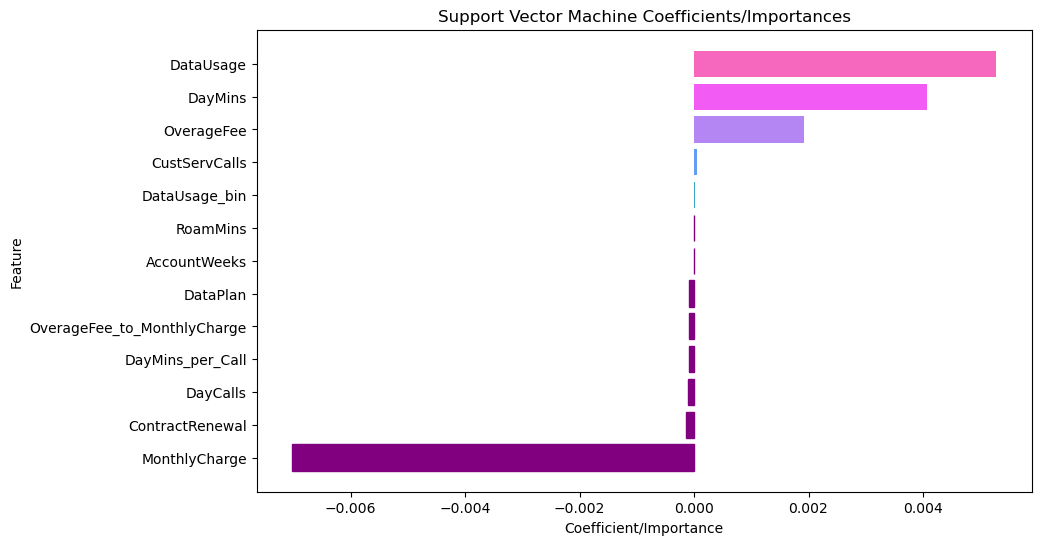

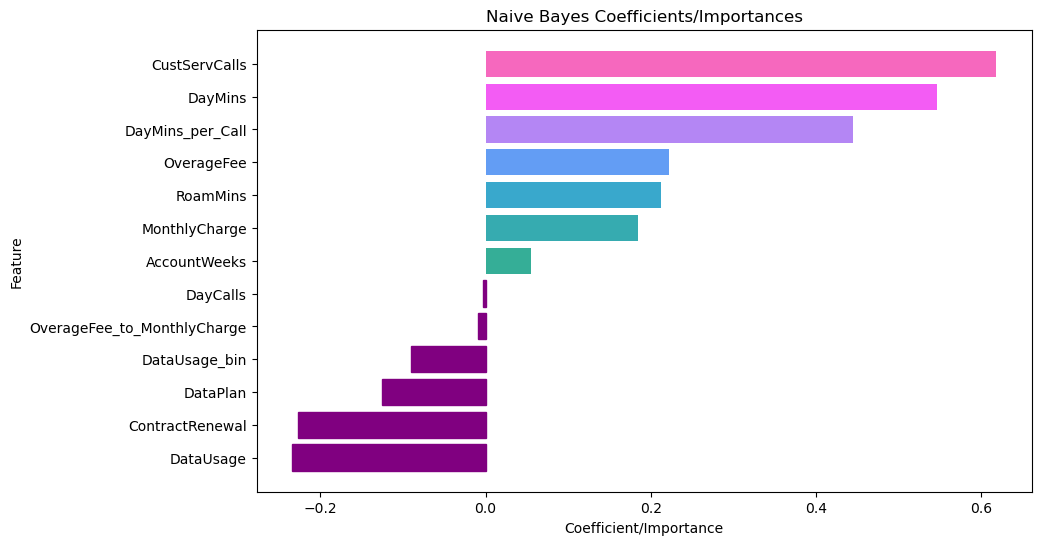

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
X = ChurnModelling.drop('Churn', axis=1)
y = ChurnModelling['Churn']

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMins_per_Call', 'OverageFee_to_MonthlyCharge']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(kernel='linear', probability=True),  # Use linear kernel to extract coefficients
    'Naive Bayes': GaussianNB()
}

# Fit models and store their coefficients/importances
model_coeffs = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    if name == 'Logistic Regression' or name == 'Support Vector Machine':
        coeffs = model.coef_[0]
    elif name == 'Naive Bayes':
        coeffs = model.theta_[1] - model.theta_[0]  # Difference in means for Naive Bayes
    else:
        coeffs = model.feature_importances_
    model_coeffs[name] = coeffs

# Plotting bar charts for all variables
for column in X.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=ChurnModelling['Churn'], y=ChurnModelling[column])
    plt.title(f'Bar Chart of {column} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
    plt.show()

# Function to plot coefficients/importances with different colors
def plot_coefficients(model_name, coeffs):
    coeffs_series = pd.Series(coeffs, index=X.columns)
    sorted_coeffs = coeffs_series.sort_values()
    
    # Create a color palette
    palette = sns.color_palette("husl", len(sorted_coeffs))
    
    # Plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(sorted_coeffs.index, sorted_coeffs.values, color=palette)
    
    # Color bars based on sign
    for bar, color in zip(bars, palette):
        if bar.get_width() < 0:
            bar.set_color('purple')  # Example: negative values in purple
    
    plt.title(f'{model_name} Coefficients/Importances')
    plt.xlabel('Coefficient/Importance')
    plt.ylabel('Feature')
    plt.show()

# Plotting coefficients/importances for each model
for name, coeffs in model_coeffs.items():
    plot_coefficients(name, coeffs)


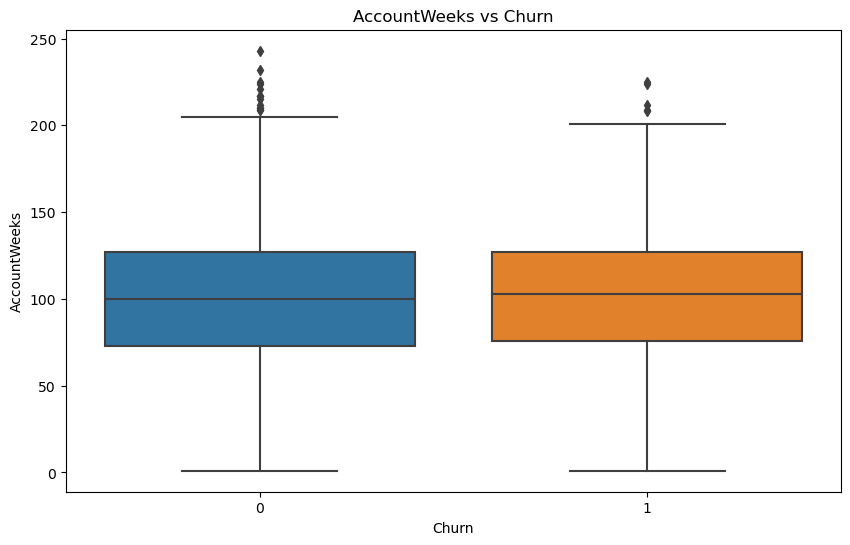

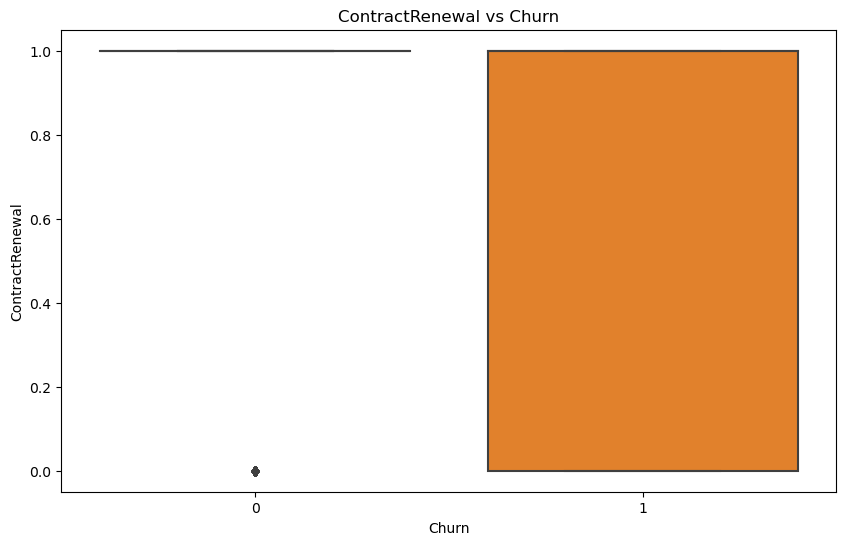

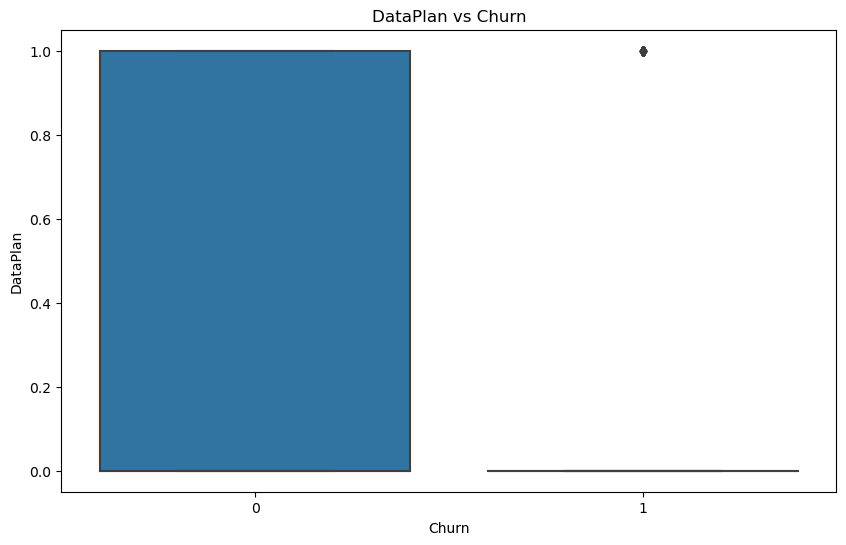

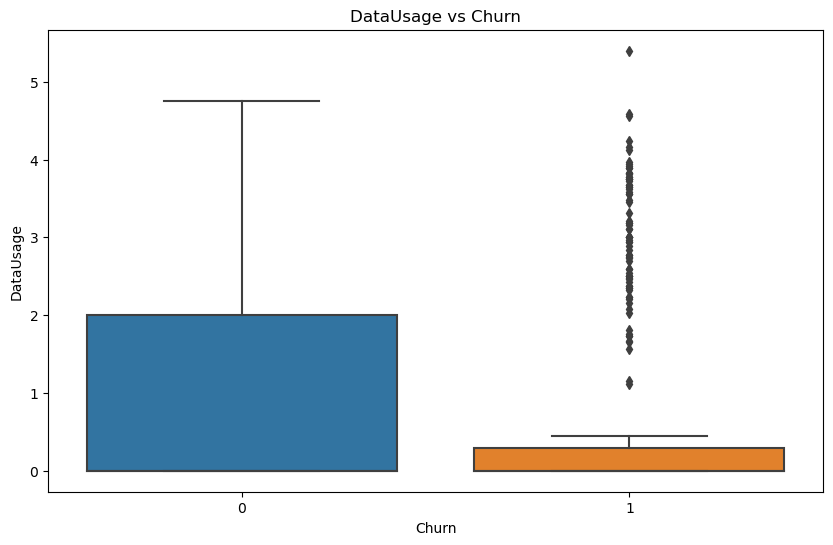

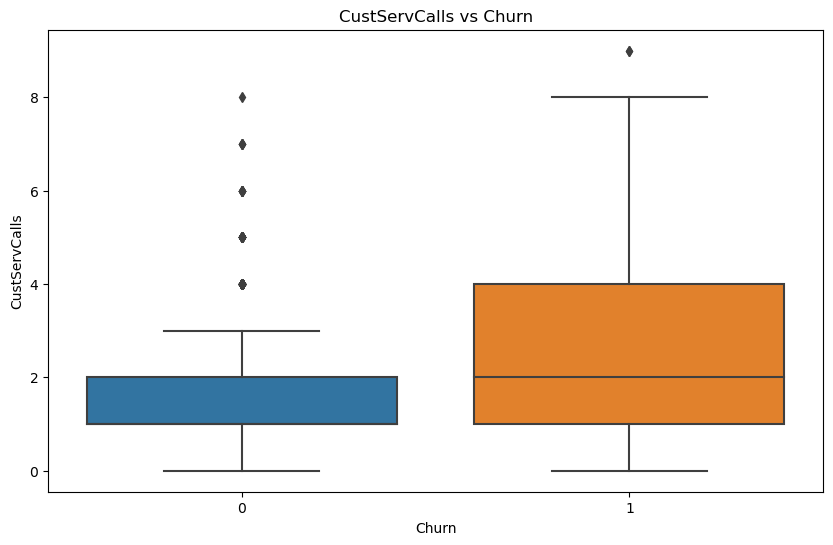

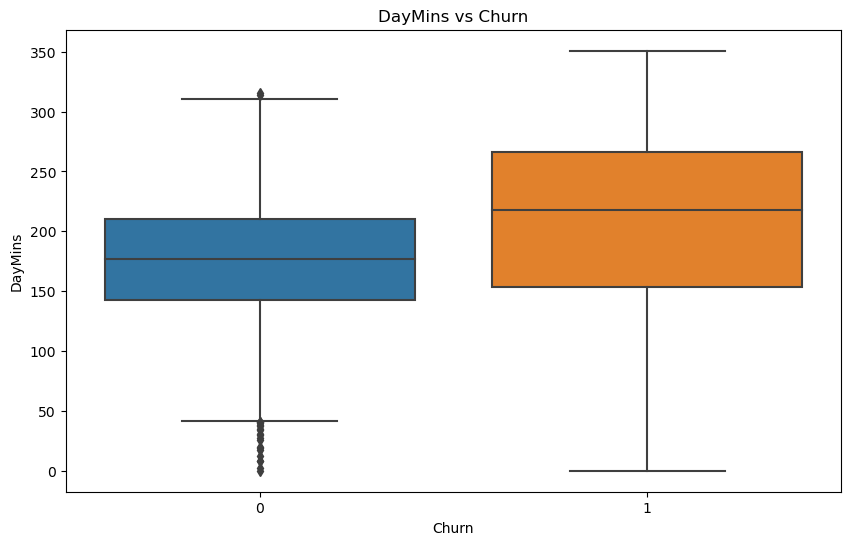

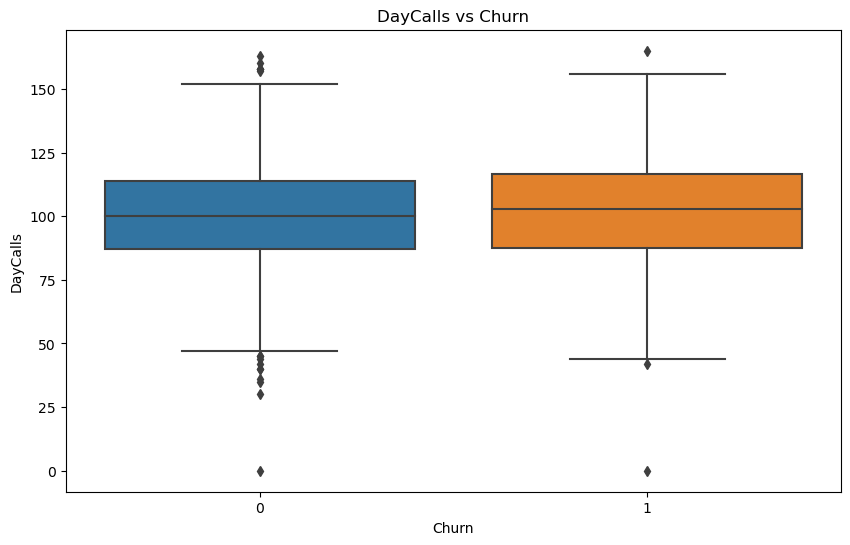

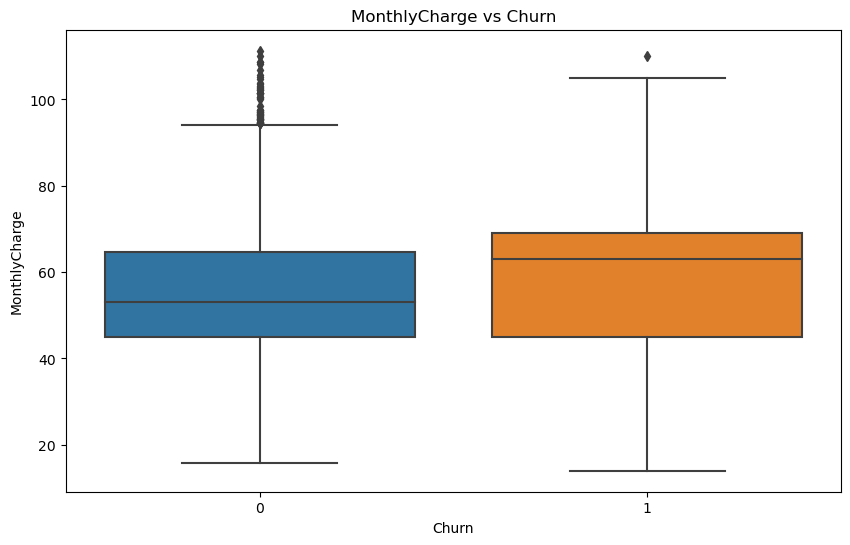

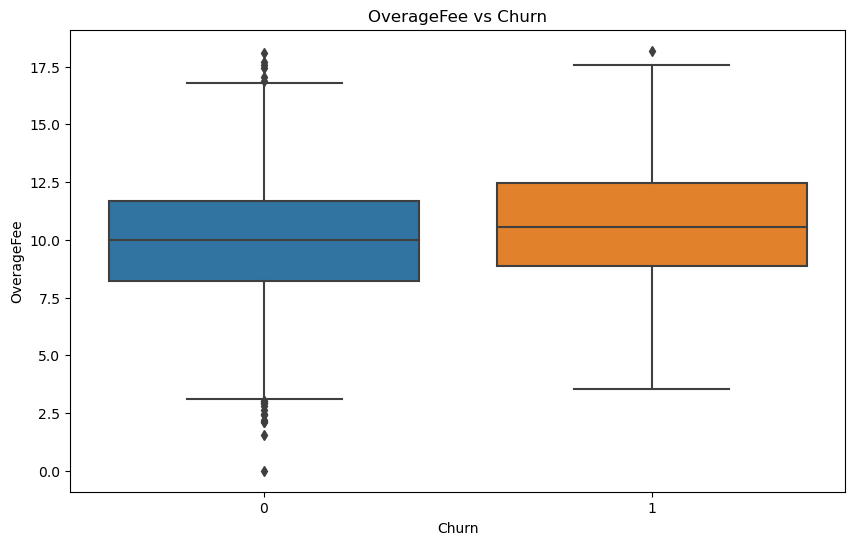

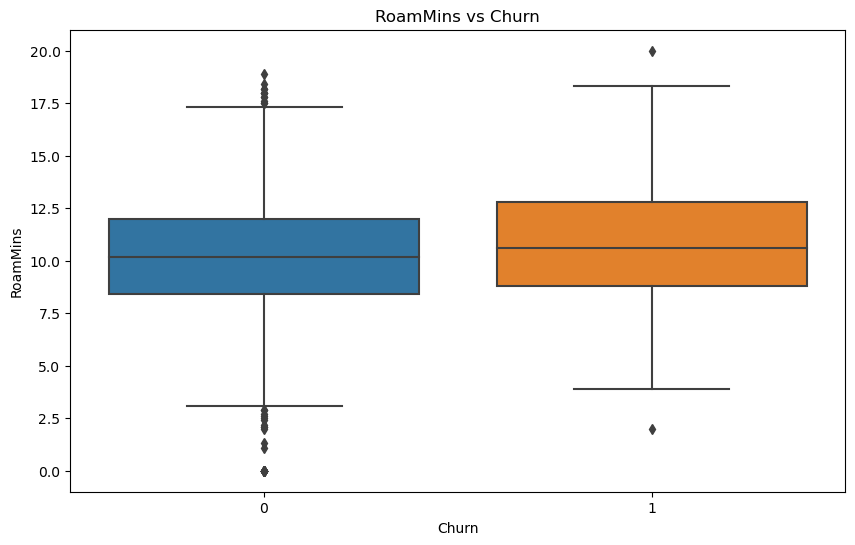

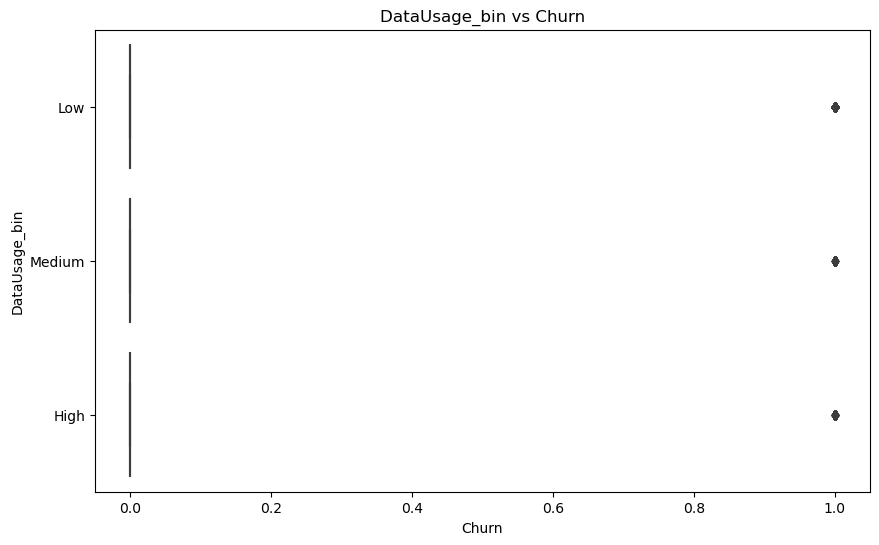

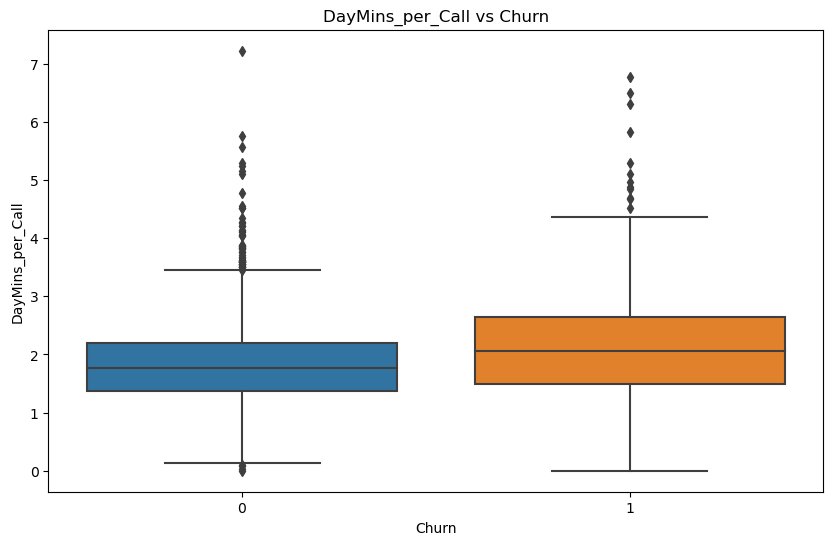

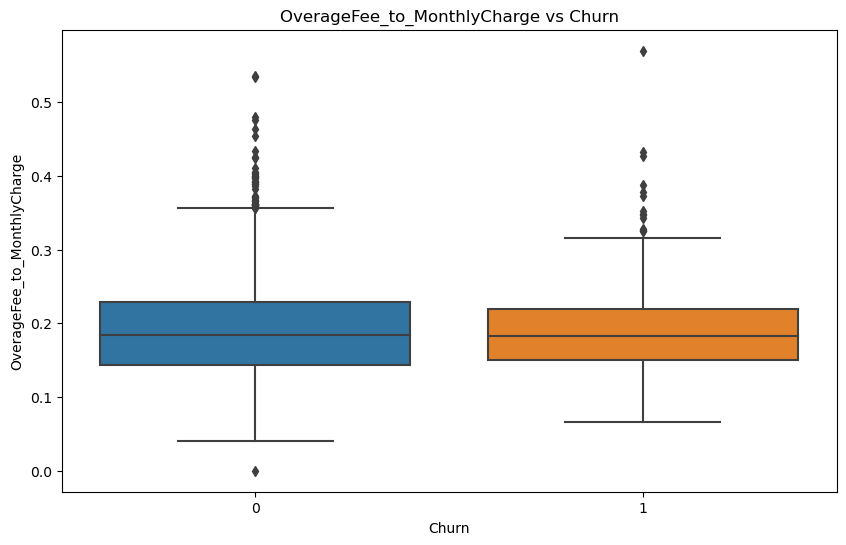

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df=os.path.join(r"C:\Users\pabba\OneDrive\Documents\Python Data Analysis\Capstone Project\Dataset.csv")
ChurnModelling=pd.read_csv(df)
ChurnModelling

# Create a binned variable based on DataUsage into three levels: low, medium, high
ChurnModelling['DataUsage_bin'] = pd.cut(ChurnModelling['DataUsage'], bins=[-np.inf, ChurnModelling['DataUsage'].quantile(0.33), ChurnModelling['DataUsage'].quantile(0.66), np.inf], labels=['Low', 'Medium', 'High'])

# Create new features
ChurnModelling['DayMins_per_Call'] = ChurnModelling['DayMins'] / ChurnModelling['DayCalls']
ChurnModelling['OverageFee_to_MonthlyCharge'] = ChurnModelling['OverageFee'] / ChurnModelling['MonthlyCharge']

# Fill NaN values (if any) resulting from division
ChurnModelling.fillna(0, inplace=True)

# Visualization
def plot_features_vs_churn(ChurnModelling, feature, target='Churn'):
    plt.figure(figsize=(10, 6))
    if ChurnModelling[feature].dtype == 'object':
        sns.countplot(x=feature, hue=target, data=ChurnModelling)
    else:
        sns.boxplot(x=target, y=feature, data=ChurnModelling)
    plt.title(f'{feature} vs {target}')
    plt.show()

features = ChurnModelling.columns.drop('Churn')

for feature in features:
    plot_features_vs_churn(ChurnModelling, feature)


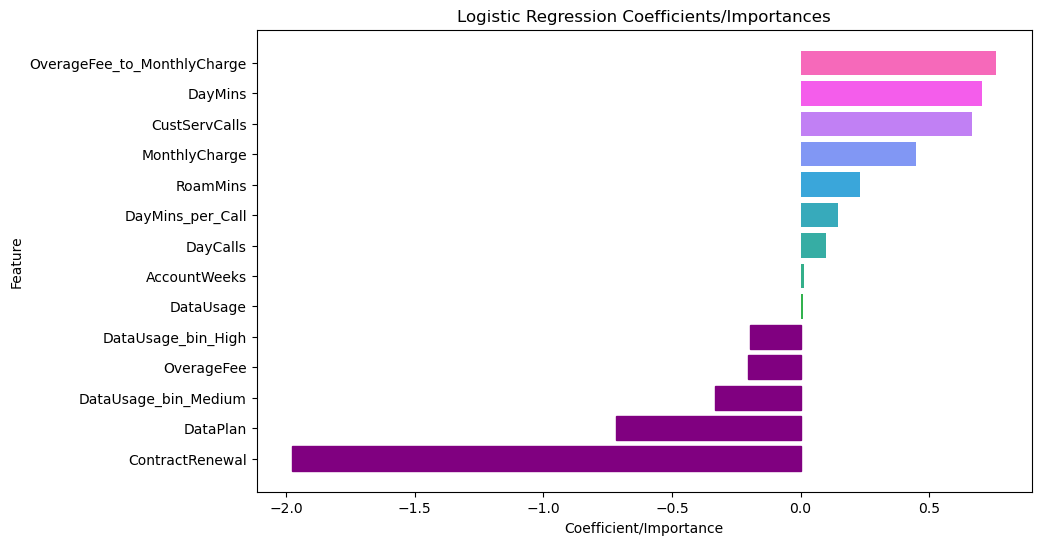

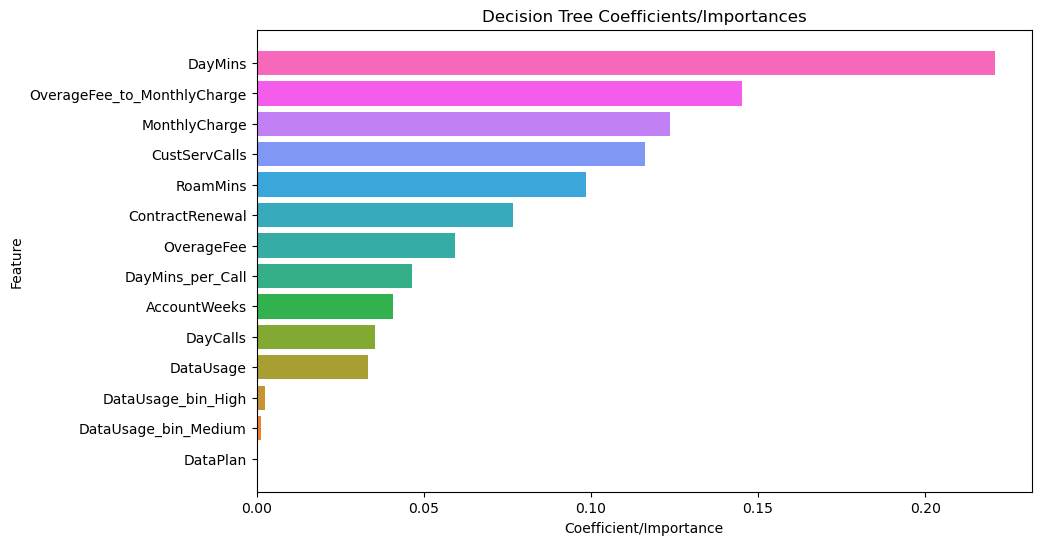

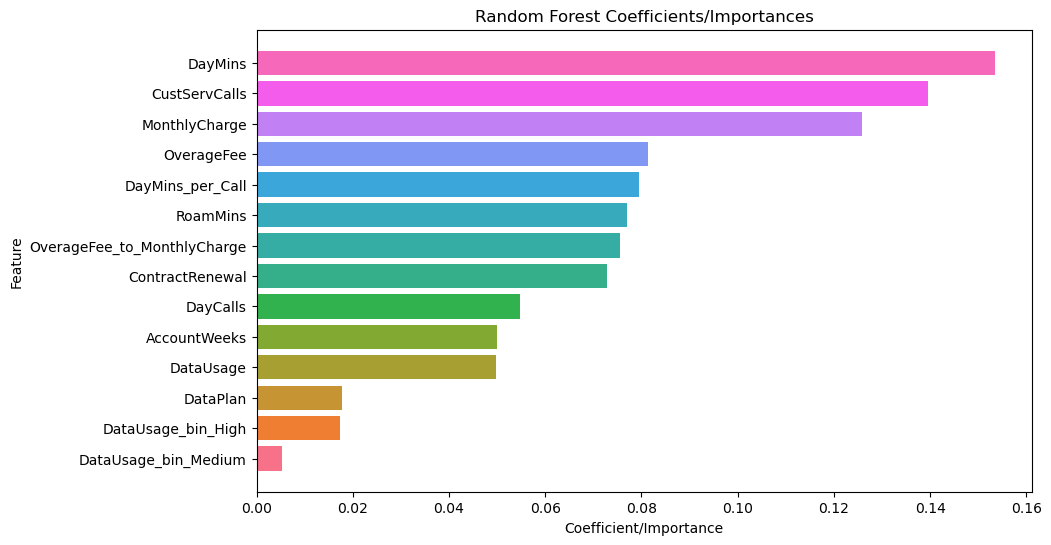

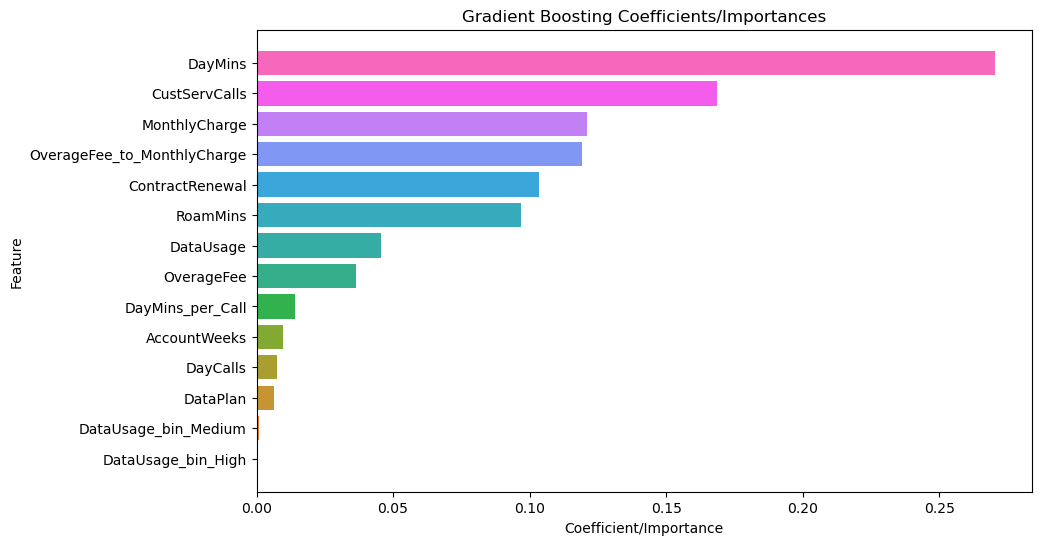

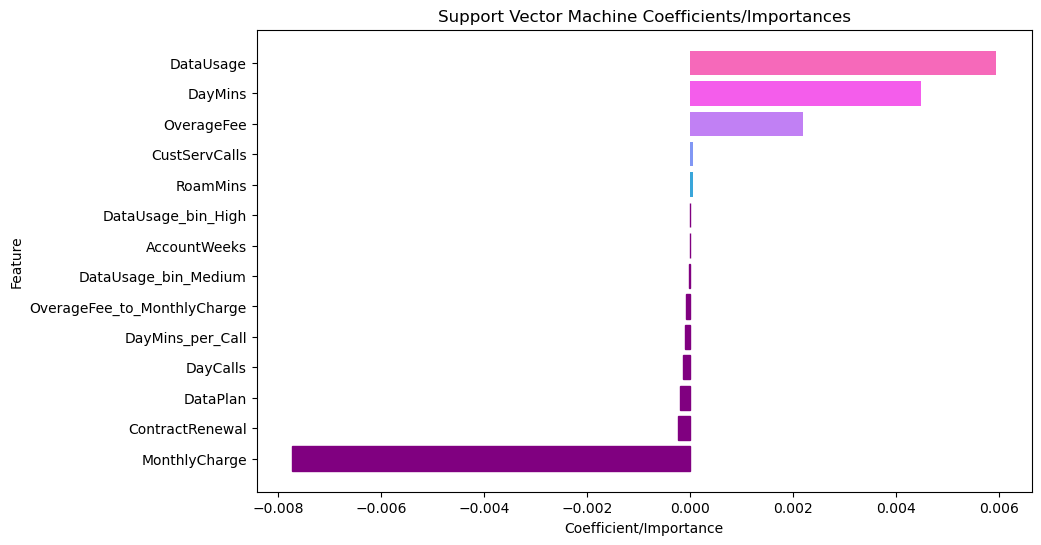

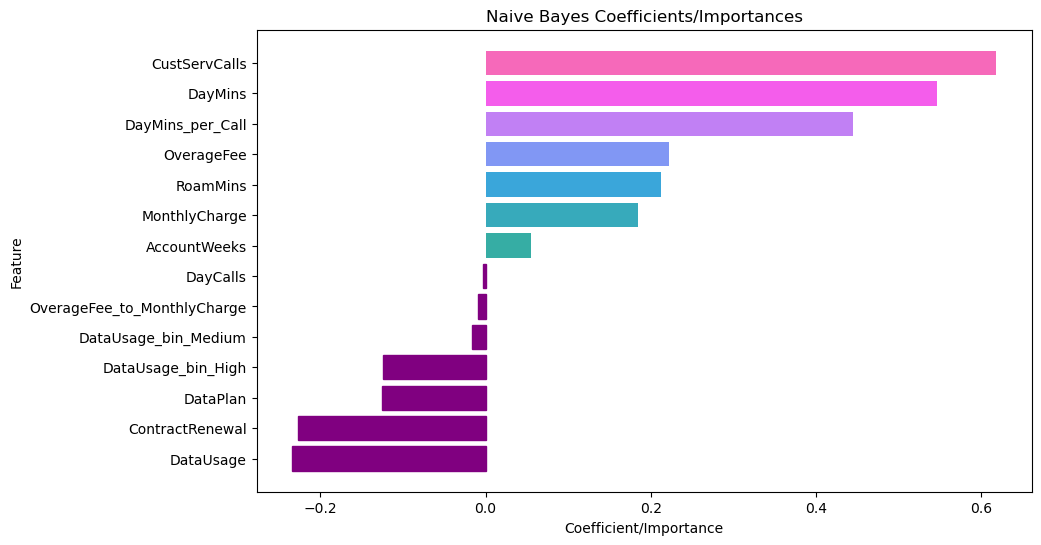

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Preprocessing
X = ChurnModelling.drop('Churn', axis=1)
y = ChurnModelling['Churn']

# One-hot encode the binned variable
X = pd.get_dummies(X, columns=['DataUsage_bin'], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMins_per_Call', 'OverageFee_to_MonthlyCharge']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Dictionary to store models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(kernel='linear', probability=True),  # Use linear kernel to extract coefficients
    'Naive Bayes': GaussianNB()
}

# Fit models and store their coefficients/importances
model_coeffs = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    if name == 'Logistic Regression' or name == 'Support Vector Machine':
        coeffs = model.coef_[0]
    elif name == 'Naive Bayes':
        coeffs = model.theta_[1] - model.theta_[0]  # Difference in means for Naive Bayes
    else:
        coeffs = model.feature_importances_
    model_coeffs[name] = coeffs

# Function to plot coefficients/importances with different colors
def plot_coefficients(model_name, coeffs):
    coeffs_series = pd.Series(coeffs, index=X.columns)
    sorted_coeffs = coeffs_series.sort_values()
    
    # Create a color palette
    palette = sns.color_palette("husl", len(sorted_coeffs))
    
    # Plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(sorted_coeffs.index, sorted_coeffs.values, color=palette)
    
    # Color bars based on sign
    for bar, color in zip(bars, palette):
        if bar.get_width() < 0:
            bar.set_color('purple')  # Example: negative values in purple
    
    plt.title(f'{model_name} Coefficients/Importances')
    plt.xlabel('Coefficient/Importance')
    plt.ylabel('Feature')
    plt.show()

# Plotting coefficients/importances for each model
for name, coeffs in model_coeffs.items():
    plot_coefficients(name, coeffs)


In [20]:
# Identify key features contributing to higher churn
def key_features(coeffs, feature_names):
    coeffs_series = pd.Series(coeffs, index=feature_names)
    sorted_coeffs = coeffs_series.sort_values(ascending=False)
    positive_contributors = sorted_coeffs[sorted_coeffs > 0]
    negative_contributors = sorted_coeffs[sorted_coeffs < 0]
    return positive_contributors, negative_contributors

for name, coeffs in model_coeffs.items():
    positive_contributors, negative_contributors = key_features(coeffs, X.columns)
    print(f'\nModel: {name}')
    print('Positive contributors to churn:')
    print(positive_contributors)
    print('\nNegative contributors to churn:')
    print(negative_contributors)



Model: Logistic Regression
Positive contributors to churn:
OverageFee_to_MonthlyCharge    0.760464
DayMins                        0.703069
CustServCalls                  0.664712
MonthlyCharge                  0.447118
RoamMins                       0.229738
DayMins_per_Call               0.143531
DayCalls                       0.097304
AccountWeeks                   0.013393
DataUsage                      0.010129
dtype: float64

Negative contributors to churn:
DataUsage_bin_High     -0.198235
OverageFee             -0.203491
DataUsage_bin_Medium   -0.332164
DataPlan               -0.717635
ContractRenewal        -1.977790
dtype: float64

Model: Decision Tree
Positive contributors to churn:
DayMins                        0.220761
OverageFee_to_MonthlyCharge    0.145101
MonthlyCharge                  0.123665
CustServCalls                  0.116297
RoamMins                       0.098488
ContractRenewal                0.076619
OverageFee                     0.059265
DayMins_per_Call  